<a href="https://colab.research.google.com/github/Ionicburn/adsp-mit/blob/main/RobertKellogg_CapstonePrjDeepLearningCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Capstone Project - Malaria Detection
##Context
Malaria is a contagious disease caused by Plasmodium parasites that are transmitted to humans
through the bites of infected female Anopheles mosquitoes. The parasites enter the blood and begin
damaging red blood cells (RBCs) that carry oxygen, which can result in respiratory distress and other
complications. The lethal parasites can stay alive for more than a year in a person’s body without
showing any symptoms. Therefore, late treatment can cause complications and could even be fatal.
Almost 50% of the world’s population is in danger from malaria. There were more than 229 million
malaria cases and 400,000 malaria-related deaths reported over the world in 2019. Children under 5
years of age are the most vulnerable population group affected by malaria; in 2019 they accounted
for 67% of all malaria deaths worldwide.
Traditional diagnosis of malaria in the laboratory requires careful inspection by an experienced
professional to discriminate between healthy and infected red blood cells. It is a tedious,
time-consuming process, and the diagnostic accuracy (which heavily depends on human expertise)
can be adversely impacted by inter-observer variability.
An automated system can help with the early and accurate detection of malaria. Applications of
automated classification techniques using Machine Learning (ML) and Artificial Intelligence (AI) have
consistently shown higher accuracy than manual classification. It would therefore be highly beneficial
to propose a method that performs malaria detection using Deep Learning Algorithms.


##Objective
Build an efficient computer vision model to detect malaria. The model should identify whether the
image of a red blood cell is that of one infected with malaria or not, and classify the same as
parasitized or uninfected, respectively.
##About the dataset
There are a total of 24,958 train and 2,600 test images (colored) with an equal number of parasitized
and uninfected instances, where:
● The parasitized cells contain the Plasmodium parasite
● The uninfected cells are free of the Plasmodium parasites but could contain other impurities
Note:
1. The images in the dataset are not of equal sizes. We will resize the images to 224x224, which
is the standard input image size of the majority of pre-trained CNN models.
2. These images require some preprocessing before they can be used in Google Colab. The
code for the same is given below.



In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Code to load the data in Google Colab


In [1]:
#Importing libraries required to load the data

import zipfile

import os

from PIL import Image

import numpy as np

In [2]:
#Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Colab Notebooks/Capstone Project/cell_images.zip'

#The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
#Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

#Size of image so that each image has the same size
SIZE = 64

#Empty list to store the training images after they are converted to NumPy arrays
train_images = []

#Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [4]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            #Resizing each image to (224,224)
            image = image.resize((SIZE, SIZE))

            #Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                train_labels.append(1)
            else:
                train_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [5]:
#Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

#Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

#Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

#Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [6]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            #Resizing each image to (224,224)
            image = image.resize((SIZE, SIZE))
            
            #Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                test_labels.append(1)
            else:
                test_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

#Import Library Files

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical

In [8]:
len(train_images), len(test_images)

(24958, 2600)

In [9]:
len(train_labels), len(test_labels)

(24958, 2600)

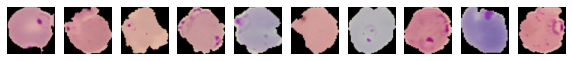

label for each of the above image: [1 1 1 1 1 1 1 1 1 1]


In [10]:
# visualizing the first 10 images in the train dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_images[i], cmap="gray") 
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (train_labels[0:10]))

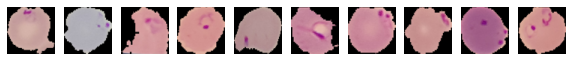

label for each of the above image: [1 1 1 1 1 1 1 1 1 1]


In [11]:
# visualizing the first 10 images in the test dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(test_images[i], cmap="gray")
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (test_labels[0:10]))

#Data Preparation

In [12]:
# Shape of the images and the first image

print("Shape:", train_images[0].shape)
print()
print("First image:\n", train_images[0])

Shape: (64, 64, 3)

First image:
 [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [63]:
train_copy = train_images
test_copy = test_images

In [74]:
# Reshaping the dataset to flatten them. Remember that we always have to give a 4D array as input to CNNs

train_copy = train_copy.reshape(train_copy.shape[0], 64,64,3)
test_copy = test_copy.reshape(test_copy.shape[0], 64,64,3)

In [75]:
# Normalize inputs from 0-255 to 0-1

train_copy= train_copy / 255.0
test_copy = test_copy / 255.0

In [76]:
# New shape 

print('Training set:', train_copy.shape, train_labels.shape)
print('Test set:', test_copy.shape, test_labels.shape)

Training set: (24958, 64, 64, 3) (24958,)
Test set: (2600, 64, 64, 3) (2600,)


In [77]:
#Write the function and appropriate variable name to one-hot encode the output

train_labels_ohe = tf.keras.utils.to_categorical(train_labels)
test_labels_ohe = tf.keras.utils.to_categorical(test_labels)

#test labels
test_labels_ohe

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

#Model Building

In [78]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [79]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def cnn_model_1():
    model = Sequential() 
    #Add layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape = (64,64,3)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dense(2, activation='softmax'))
    #declare adam optimizer with learning rate of 0.001 
    adam = optimizers.Adam(0.001)
    
    #compile the model
    model.compile(loss = 'categorical_crossentropy', optimizer= adam, metrics =['accuracy'])
    
    return model

In [80]:
#Build the model
model_1 = cnn_model_1()

In [81]:
#Print the model summary
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)               

In [ ]:
# Fit the model
history_model_1 = model_1.fit(train_copy, train_labels_ohe, validation_split=0.2, batch_size=32, verbose=1, epochs=20)

Epoch 1/20
624/624 [==============================] - 146s 233ms/step - loss: 0.6639 - accuracy: 0.6248 - val_loss: 0.9480 - val_accuracy: 0.0000e+00
Epoch 2/20
624/624 [==============================] - 143s 229ms/step - loss: 0.6458 - accuracy: 0.6351 - val_loss: 1.5320 - val_accuracy: 0.0144
Epoch 3/20
624/624 [==============================] - 144s 231ms/step - loss: 0.6114 - accuracy: 0.6713 - val_loss: 1.0013 - val_accuracy: 0.2939
Epoch 4/20
624/624 [==============================] - 144s 231ms/step - loss: 0.5838 - accuracy: 0.6943 - val_loss: 0.8552 - val_accuracy: 0.3948
Epoch 5/20
624/624 [==============================] - 145s 233ms/step - loss: 0.5648 - accuracy: 0.7087 - val_loss: 1.0549 - val_accuracy: 0.3103
Epoch 6/20
624/624 [==============================] - 145s 233ms/step - loss: 0.5611 - accuracy: 0.7160 - val_loss: 0.8156 - val_accuracy: 0.4740
Epoch 7/20
624/624 [==============================] - 146s 234ms/step - loss: 0.5461 - accuracy: 0.7247 - val_loss: 0.91